<a href="https://colab.research.google.com/github/sitthatkaja/multivariate/blob/main/EXAM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***
## **Exam ครั้งที่ 1**
**แบ่งเป็น 2 อัน**

**1. pizza.csv**

**2. nndb_flat.csv หาคู่ใหม่**
***

***
**Run คำสั่งทั้งหมด**

In [54]:
import pandas as pd

In [55]:
import numpy as np

In [56]:
from matplotlib import pyplot as plt

In [57]:
from scipy import stats

In [58]:
from sklearn.decomposition import PCA

***
***
#**1. Pizza.csv**
***


**Run ข้อมูลที่ได้มา**

In [59]:
exam = pd.read_csv('Pizza.csv') #เป็นข้อมูลของ pizza


In [60]:
exam

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


***
**ทำการ plot scatter matrix ของข้อมูลที่ได้**

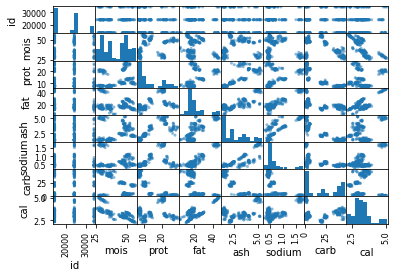

In [61]:
## ลอง plot กราฟเพื่อดู
pd.plotting.scatter_matrix(exam);

***
**ดู matrix ของข้อมูล exam โดยไม่เอา brand และ id**

In [62]:
exam_matrix = np.array(exam.iloc[:,-7:])
exam_matrix
##เพื่อดู matrix ของ exam 

array([[27.82, 21.43, 44.87, ...,  1.77,  0.77,  4.93],
       [28.49, 21.26, 43.89, ...,  1.79,  1.02,  4.84],
       [28.35, 19.99, 45.78, ...,  1.63,  0.8 ,  4.95],
       ...,
       [44.55, 11.01, 16.03, ...,  0.64, 25.98,  2.92],
       [47.6 , 10.43, 15.18, ...,  0.56, 24.47,  2.76],
       [46.84,  9.91, 15.5 , ...,  0.57, 25.48,  2.81]])

In [63]:
exam_matrix = exam_matrix.T
print(exam_matrix.shape)
exam_matrix

(7, 300)


array([[27.82, 28.49, 28.35, ..., 44.55, 47.6 , 46.84],
       [21.43, 21.26, 19.99, ..., 11.01, 10.43,  9.91],
       [44.87, 43.89, 45.78, ..., 16.03, 15.18, 15.5 ],
       ...,
       [ 1.77,  1.79,  1.63, ...,  0.64,  0.56,  0.57],
       [ 0.77,  1.02,  0.8 , ..., 25.98, 24.47, 25.48],
       [ 4.93,  4.84,  4.95, ...,  2.92,  2.76,  2.81]])

***
##**1.ปรับ mean = 0 และ std = 1**

**เพื่อให้ง่ายต่อการใช้จึงใช้วิธีแบบเร็วโดย stat.zscore เพื่อให้ได้ค่าที่ต้องการเลย**

In [64]:
exam_matrix_m0_std1 = stats.zscore(exam_matrix,axis=1)
exam_matrix_m0_std1

array([[-1.37181459, -1.30156227, -1.31624186, ...,  0.3823963 ,
         0.70220164,  0.62251244],
       [ 1.25418127,  1.22771661,  1.03000998, ..., -0.36794707,
        -0.45823828, -0.53918903],
       [ 2.74984143,  2.64047481,  2.85139615, ..., -0.46866201,
        -0.56352082, -0.52780927],
       ...,
       [ 2.97668662,  3.03077869,  2.59804213, ..., -0.07951534,
        -0.29588362, -0.26883759],
       [-1.22751105, -1.21362189, -1.22584435, ...,  0.1730719 ,
         0.08918137,  0.14529358],
       [ 2.68012924,  2.53473344,  2.71243942, ..., -0.56704362,
        -0.82552504, -0.7447496 ]])

**เช็คค่า mean**

In [65]:
np.mean(exam_matrix_m0_std1,axis=1)

array([-1.18423789e-16,  1.89478063e-16, -2.36847579e-16, -5.21064673e-16,
       -2.36847579e-16, -4.73695157e-17,  1.89478063e-16])

**เช็คค่า std**

In [66]:
np.std(exam_matrix_m0_std1,axis=1)

array([1., 1., 1., 1., 1., 1., 1.])

***
**กราฟแสดงค่าเมือปรับ mean = 0 , std = 1**

(array([ 8., 46., 29., 10., 38., 13.,  5.,  1., 11., 47., 35., 22., 25.,
        10.]),
 array([-1.66750345, -1.42618899, -1.18487452, -0.94356005, -0.70224558,
        -0.46093111, -0.21961664,  0.02169783,  0.2630123 ,  0.50432677,
         0.74564124,  0.98695571,  1.22827018,  1.46958465,  1.71089912]),
 <a list of 14 Patch objects>)

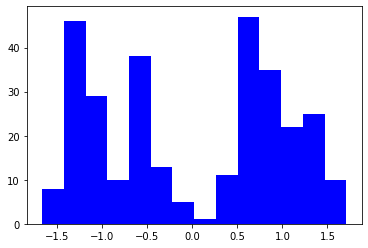

In [67]:
plt.hist(exam_matrix_m0_std1[0,:],bins = 'rice', color = 'b') ##กราฟแท่งเฉพาะที่ตั้งค่า mean = 0 , std = 1 แล้ว

***
**เปรียบเทียบระหว่างที่ยังไม่ปรับ mean และ std (สีแดง) กับ ปรับ mean และ std แล้ว (สีน้ำเงิน)**

(array([ 8., 46., 29., 10., 38., 13.,  5.,  1., 11., 47., 35., 22., 25.,
        10.]),
 array([-1.66750345, -1.42618899, -1.18487452, -0.94356005, -0.70224558,
        -0.46093111, -0.21961664,  0.02169783,  0.2630123 ,  0.50432677,
         0.74564124,  0.98695571,  1.22827018,  1.46958465,  1.71089912]),
 <a list of 14 Patch objects>)

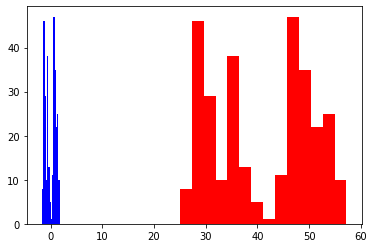

In [68]:
plt.hist(exam_matrix[0,:],bins = 'rice', color = 'r') #กราฟแท่งแบบยังไม่ทำ mean = 0 , std = 1
plt.hist(exam_matrix_m0_std1[0,:],bins = 'rice', color = 'b')  #กราฟแท่งแบบทำ mean = 0 , std = 1
#เทียบกราฟกัน

***
##**2. หา covariance matrix ของข้อมูล**

In [69]:
exam_cov = np.cov(exam_matrix_m0_std1)
exam_cov # หา covarince

array([[ 1.00334448,  0.36145252, -0.17189118,  0.26644367, -0.10262097,
        -0.59378092, -0.7669972 ],
       [ 0.36145252,  1.00334448,  0.49966723,  0.82659903,  0.43056473,
        -0.85639691,  0.07049308],
       [-0.17189118,  0.49966723,  1.00334448,  0.79428157,  0.93644671,
        -0.64237943,  0.76712418],
       [ 0.26644367,  0.82659903,  0.79428157,  1.00334448,  0.8108249 ,
        -0.90199502,  0.32756032],
       [-0.10262097,  0.43056473,  0.93644671,  0.8108249 ,  1.00334448,
        -0.6222505 ,  0.67420485],
       [-0.59378092, -0.85639691, -0.64237943, -0.90199502, -0.6222505 ,
         1.00334448, -0.02356313],
       [-0.7669972 ,  0.07049308,  0.76712418,  0.32756032,  0.67420485,
        -0.02356313,  1.00334448]])

***
##**3.คำนวณ Eigenvectors and Eigenvalues**

In [70]:
eigen_values, eigen_vectors = np.linalg.eig(exam_cov)

**ดูค่า eigen value**

In [71]:
eigen_values

array([4.18573434e+00, 2.29811778e+00, 4.15948838e-01, 9.54925358e-02,
       2.77695834e-02, 3.38738483e-04, 9.55061572e-06])

**ดูค่า eigen vector**

In [72]:
eigen_vectors

array([[ 6.47093729e-02,  6.28275866e-01, -4.21668945e-01,
        -2.20721584e-01,  6.47029345e-03, -4.46449902e-01,
        -4.18569035e-01],
       [ 3.78760904e-01,  2.69706650e-01,  7.46027442e-01,
        -1.05931982e-02,  3.87982788e-01,  1.71520299e-04,
        -2.76764643e-01],
       [ 4.46665915e-01, -2.34379085e-01, -1.99308714e-01,
        -5.07042158e-01, -1.73367634e-01,  5.25402868e-01,
        -3.77671525e-01],
       [ 4.71889526e-01,  1.10990417e-01,  5.62726863e-02,
         5.52398549e-01, -6.70885701e-01, -5.88609281e-02,
        -5.60214003e-02],
       [ 4.35702887e-01, -2.01661652e-01, -4.55168874e-01,
         4.46276890e-01,  6.02614079e-01, -3.13098518e-03,
         5.24323817e-04],
       [-4.24913712e-01, -3.20312078e-01,  5.22365058e-02,
         3.34339481e-01, -7.43689883e-03,  5.08853525e-04,
        -7.76067911e-01],
       [ 2.44487304e-01, -5.67457559e-01,  1.13315588e-01,
        -2.79263154e-01, -7.80031747e-02, -7.21913853e-01,
        -1.2059809

***
## **4 คำนวณว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมด ได้ดีแค่ไหน**
โดยที่ผลรวมของ eigen value = 7.0234

In [73]:
sum(eigen_values)

7.0234113712374535

**หาค่า variance ทั้ง 7 ตัว**

In [74]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[59.59688423344787, 32.720819826580865, 5.9223191753902285, 1.3596318186805307, 0.3953859725404401, 0.004822990783854994, 0.00013598257622030136]


**ผลรวมของค่า variance รวมกันจะได้เท่ากับ 100**

In [75]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 59.59688423  92.31770406  98.24002324  99.59965505  99.99504103
  99.99986402 100.        ]


**เพื่อให้ง่ายต่อการหาข้อมูลที่ระดับ 90% จึงใช้ 2 ข้อมูล 
และใช้แบบนี้เป็นหลัก**

In [76]:
selected_eigen_vectors = eigen_vectors[:,:2] #ใช้อันนี้เป็นหลัก
selected_eigen_vectors

array([[ 0.06470937,  0.62827587],
       [ 0.3787609 ,  0.26970665],
       [ 0.44666592, -0.23437908],
       [ 0.47188953,  0.11099042],
       [ 0.43570289, -0.20166165],
       [-0.42491371, -0.32031208],
       [ 0.2444873 , -0.56745756]])

**หากรู้สึกว่า 90 % ไม่พอต้องมากกว่า 95 % ให้ใช้ 3 ข้อมูล**

In [77]:
selected_eigen_vectors_more_than_95_per = eigen_vectors[:,:3]
selected_eigen_vectors_more_than_95_per

array([[ 0.06470937,  0.62827587, -0.42166894],
       [ 0.3787609 ,  0.26970665,  0.74602744],
       [ 0.44666592, -0.23437908, -0.19930871],
       [ 0.47188953,  0.11099042,  0.05627269],
       [ 0.43570289, -0.20166165, -0.45516887],
       [-0.42491371, -0.32031208,  0.05223651],
       [ 0.2444873 , -0.56745756,  0.11331559]])

***
## **5.map data ไปบนแกนใหม่**


**ดูรูปแบบตารางรูปราง matrix ของ exam ที่ปรับ mean และ std**

In [78]:
X = exam_matrix_m0_std1
X.shape

(7, 300)

**ดูรูปแบบตารางรูปร่าง matrix ของ eigen vector ที่เลือกไว้**

In [79]:
W_90_per = selected_eigen_vectors
W_90_per.shape

(7, 2)

In [80]:
X_pca = X.T.dot(W_90_per)
X_pca

array([[ 5.01034284, -2.67921532],
       [ 5.02375538, -2.52929455],
       [ 4.8054393 , -2.67370033],
       [ 4.4695434 , -2.28502923],
       [ 4.47189256, -2.1591524 ],
       [ 4.50479978, -2.16797296],
       [ 4.31535781, -2.05704328],
       [ 4.75785167, -2.35308587],
       [ 4.85461934, -2.68121904],
       [ 4.91640631, -2.65851314],
       [ 4.84099582, -2.73660839],
       [ 4.89136871, -2.74250173],
       [ 4.61075407, -2.57925365],
       [ 4.42153254, -2.29169853],
       [ 4.46677678, -2.13288492],
       [ 4.75343467, -2.46713643],
       [ 4.44513083, -1.82836512],
       [ 4.20201792, -1.80148331],
       [ 4.49687192, -1.88605015],
       [ 4.60756167, -2.2350726 ],
       [ 4.85726834, -2.96634356],
       [ 4.82265249, -2.78671232],
       [ 4.51834142, -2.16243103],
       [ 4.25395639, -2.12444278],
       [ 4.48975064, -2.0179968 ],
       [ 4.5415983 , -2.38008587],
       [ 4.63411775, -2.60980367],
       [ 4.46880183, -2.43393573],
       [ 4.75034835,

**ทำค่าที่ได้มา plot ลง**

**จะเห็นได้ว่าข้อมูลทั้ง 300 ตัว นั้นเป็นสีเดียวกับแยกร้านไม่ได้**

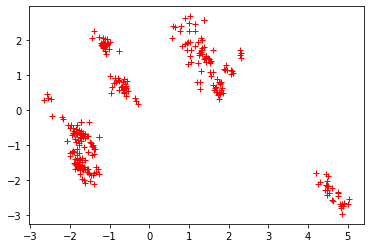

In [81]:
plt.plot(X_pca[:,0],X_pca[:,1],'+r')

**จึงทำการแยกร้าน ด้วยสีและรูปร่างที่แตกต่างกัน**

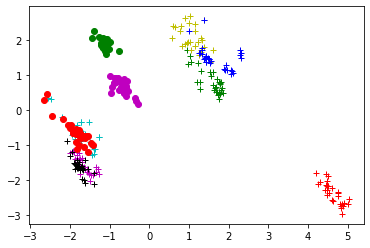

In [82]:
plt.plot(X_pca[:29,0],X_pca[:29,1],'+r')
plt.plot(X_pca[29:60,0],X_pca[29:60,1],'+g')
plt.plot(X_pca[60:87,0],X_pca[60:87,1],'+y')
plt.plot(X_pca[87:119,0],X_pca[87:119,1],'+b')
plt.plot(X_pca[119:147,0],X_pca[119:147,1],'+c')
plt.plot(X_pca[147:177,0],X_pca[147:177,1],'+m')
plt.plot(X_pca[177:206,0],X_pca[177:206,1],'+k')
plt.plot(X_pca[206:239,0],X_pca[206:239,1],'or')
plt.plot(X_pca[239:268,0],X_pca[239:268,1],'og')
plt.plot(X_pca[268:300,0],X_pca[268:300,1],'om')

***
#**PCA**

**define หรือ กำหนด ว่าเราจะใช้ 2 dimension** 

In [83]:
pca = PCA(n_components=2) 

**ทำการ fit - transform**

In [84]:
n_pca = pca.fit_transform(X.T)
n_pca

array([[ 5.01034284,  2.67921532],
       [ 5.02375538,  2.52929455],
       [ 4.8054393 ,  2.67370033],
       [ 4.4695434 ,  2.28502923],
       [ 4.47189256,  2.1591524 ],
       [ 4.50479978,  2.16797296],
       [ 4.31535781,  2.05704328],
       [ 4.75785167,  2.35308587],
       [ 4.85461934,  2.68121904],
       [ 4.91640631,  2.65851314],
       [ 4.84099582,  2.73660839],
       [ 4.89136871,  2.74250173],
       [ 4.61075407,  2.57925365],
       [ 4.42153254,  2.29169853],
       [ 4.46677678,  2.13288492],
       [ 4.75343467,  2.46713643],
       [ 4.44513083,  1.82836512],
       [ 4.20201792,  1.80148331],
       [ 4.49687192,  1.88605015],
       [ 4.60756167,  2.2350726 ],
       [ 4.85726834,  2.96634356],
       [ 4.82265249,  2.78671232],
       [ 4.51834142,  2.16243103],
       [ 4.25395639,  2.12444278],
       [ 4.48975064,  2.0179968 ],
       [ 4.5415983 ,  2.38008587],
       [ 4.63411775,  2.60980367],
       [ 4.46880183,  2.43393573],
       [ 4.75034835,

**เมื่อ plot กราฟของมูล n_pca แบบแยกร้านแล้วจะได้ดังนี้**

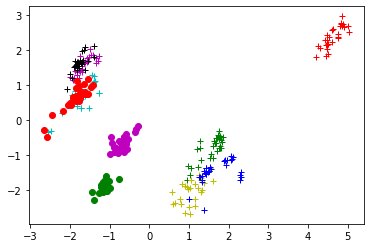

In [85]:
plt.plot(n_pca[:29,0],n_pca[:29,1],'+r')
plt.plot(n_pca[29:60,0],n_pca[29:60,1],'+g')
plt.plot(n_pca[60:87,0],n_pca[60:87,1],'+y')
plt.plot(n_pca[87:119,0],n_pca[87:119,1],'+b')
plt.plot(n_pca[119:147,0],n_pca[119:147,1],'+c')
plt.plot(n_pca[147:177,0],n_pca[147:177,1],'+m')
plt.plot(n_pca[177:206,0],n_pca[177:206,1],'+k')
plt.plot(n_pca[206:239,0],n_pca[206:239,1],'or')
plt.plot(n_pca[239:268,0],n_pca[239:268,1],'og')
plt.plot(n_pca[268:300,0],n_pca[268:300,1],'om')

***
**กลับมาดูข้อมูลเดิมอีกครั้ง**

In [86]:
exam

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


**ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions**

In [87]:
exam.shape

(300, 9)

**ลอง plot scatter matrix เพื่อดูการกระจายของ data**

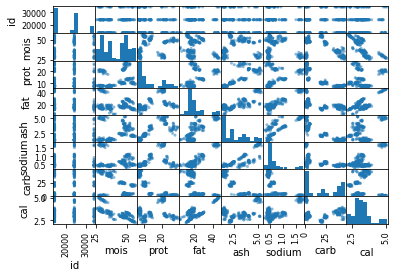

In [88]:
pd.plotting.scatter_matrix(exam);

**เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลขที่สามารถคำนวณได้**

In [89]:
newexam =  exam.iloc[:,2:]
newexam

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


**ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy**

In [90]:
corr = np.corrcoef(newexam.to_numpy().T)
corr.shape

(7, 7)

In [91]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

**วนลูปหาตัวที่ซ้ำกัน ปรากฏว่าไม่มีข้อมูลซ้ำกัน**

In [92]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'column = {i} <=> column = {j} corrcoef = {corr[i,j]}')

**exam_graph เป็นข้อมูลที่ไว้ plot และกำหนดตัวแปล**

In [93]:
exam_graph = exam.drop(['id'],axis=1)
exam_graph

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


**exam_drop เป็นข้อมูลที่ไว้คำนวณ**

In [94]:
exam_drop = exam.drop(['id','brand'],axis=1)
exam_drop

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


**ทดลอง plot กราฟ parallel coordinate**

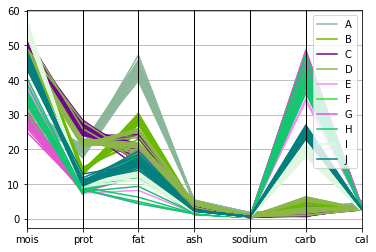

In [95]:
pd.plotting.parallel_coordinates(exam_graph, 'brand')

***
##**ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล**

**define**

In [96]:
pca = PCA(n_components=2)

**fit - transform**

In [97]:
new_exam_pca = pca.fit_transform(exam_drop.to_numpy())
new_exam_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

**รูปร่างของ new_exam_pca**

In [98]:
new_exam_pca.shape

(300, 2)

**ดุว่า brand มีอะไรบ้าง**

In [99]:
bd = set(exam['brand'])
bd

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

**สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้**

In [100]:
bd_list = list(bd)
bd_list.sort() 
color_list = {}
num = 0
for each_bd in bd:
   if each_bd not in color_list:
       color_list[each_bd] = num
       num += 1

In [101]:
color_list

{'A': 5,
 'B': 1,
 'C': 4,
 'D': 2,
 'E': 9,
 'F': 7,
 'G': 3,
 'H': 0,
 'I': 6,
 'J': 8}

**เอา color list จาก dictionary มาใส่แทนที่ text**

In [102]:
second_exam = exam_graph.replace(color_list)
second_exam

,brand,mois,prot,fat,ash,sodium,carb,cal
0,5,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,5,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,5,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,5,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,5,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,8,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,8,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,8,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,8,47.60,10.43,15.18,2.32,0.56,24.47,2.76


**plot scatter ของ brand**

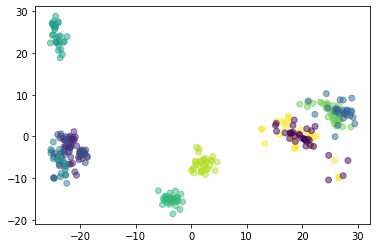

In [103]:
plt.scatter(new_exam_pca[:,0],new_exam_pca[:,1],c = second_exam['brand'],alpha=0.5)

**ทดลองเทียบ ระหว่างร้าน D กับ H**

In [104]:
exam_test = second_exam[(second_exam['brand']==2) | (second_exam['brand']==0)] 
exam_test

,brand,mois,prot,fat,ash,sodium,carb,cal
87,2,46.64,21.38,24.96,4.60,0.77,2.42,3.20
88,2,45.93,21.60,25.87,4.51,0.73,2.09,3.28
89,2,47.60,22.07,21.13,4.07,0.72,5.13,2.99
90,2,47.61,22.44,19.61,4.06,0.60,6.28,2.91
91,2,46.91,21.79,21.17,4.06,0.76,6.07,3.02
...,...,...,...,...,...,...,...,...
234,0,36.32,8.06,12.54,1.35,0.43,41.73,3.12
235,0,34.61,7.17,17.88,1.29,0.40,39.05,3.46
236,0,36.67,7.81,9.34,1.64,0.44,44.54,2.93
237,0,35.94,7.97,13.50,1.45,0.42,41.14,3.18


In [105]:
pca = PCA(n_components=2) 
new_pca_2 = pca.fit_transform(exam_test.iloc[:,1:].to_numpy())

**กราฟที่ได้จาก 2 ข้อมูลที่เลือกมา โดยไม่สามารถทราบได้ว่าสีไหนเป็นของ D หรือ H**

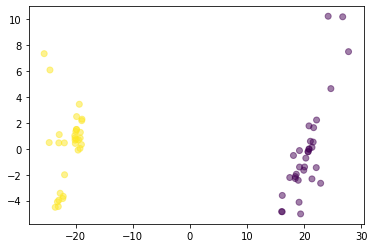

In [106]:
plt.scatter(new_pca_2[:,0],new_pca_2[:,1],c = exam_test['brand'],alpha=0.5)

In [108]:
D_pca = pca.transform(exam_test[exam_test['brand']==2].iloc[:,1:].to_numpy())
H_pca = pca.transform(exam_test[exam_test['brand']==0].iloc[:,1:].to_numpy())

**กราฟที่ได้จาก 2 ข้อมูลที่เลือกมา โดยกำหนดได้ว่าสีดำรูปบวกเป็นของ D และสีแดงวงกลม H**

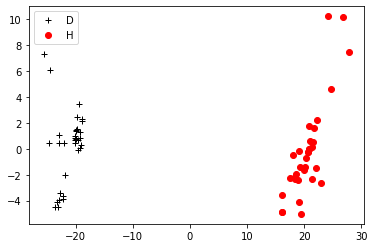

In [109]:
plt.plot(D_pca[:,0],D_pca[:,1],'+k',label='D')
plt.plot(H_pca[:,0],H_pca[:,1],'or',label='H')
plt.legend()


**Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน**

In [110]:
pca.explained_variance_ratio_

array([0.97484635, 0.0236345 ])

**กล่าวได้ว่าตัวแทนข้อมูลนั้น เป็นตัวแทนที่ดีมาก ด้วยระดับที่ 97.48 %**

**เพื่อให้เกิดความชัดเจนจึง plot แบบใหม่ให้เข้าใจง่ายมากขึ้น**

Text(0, 0.5, 'PC2 2.36%')

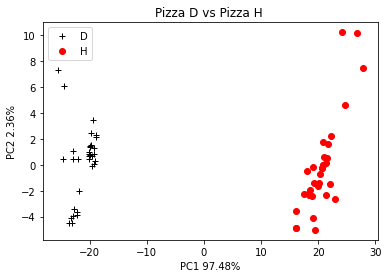

In [111]:
plt.plot(D_pca[:,0],D_pca[:,1],'+k',label='D')
plt.plot(H_pca[:,0],H_pca[:,1],'or',label='H')
plt.legend()
plt.title('Pizza D vs Pizza H '); 
plt.xlabel('PC1 97.48%'); 
plt.ylabel('PC2 2.36%')

***

***

# **2. nndb_flat.csv**
***

**run ข้อมูลโดยจำกัดแค่ 15 ตัวเนื่องจากข้อมูลที่เยอะเกินไป**

In [112]:
data = pd.read_csv('nndb_flat.csv')
data.head(15)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.000000,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.000000,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.000000,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.000000,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.000000,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.000000,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.000000,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.000000,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.000000,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.000000,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


**ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions**

In [113]:
data.shape

(8618, 45)

**plot scatter matrix**

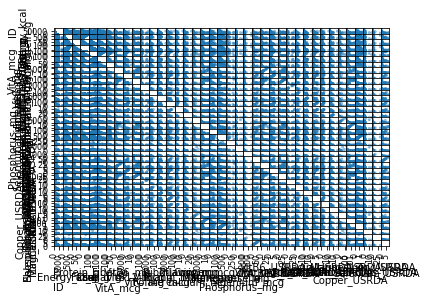

In [114]:
pd.plotting.scatter_matrix(data);

**เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก**

**เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข**

In [115]:
newdata = data.iloc[:,7:]
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


**ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy**

In [117]:
corr_2 = np.corrcoef(newdata.to_numpy().T)

In [118]:
corr_2.shape

(38, 38)

In [119]:
corr_2

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

**หาค่าข้อมูลที่ซ้ำกัน**

In [121]:
for i in range(corr_2.shape[0]):
    for j in range(corr_2.shape[1]):
        if (i !=j) and (corr_2[i,j] == 1.):
            print(f'column = {i} <=> column = {j} corrcoef = {corr_2[i,j]}')

column = 10 <=> column = 27 corrcoef = 1.0
column = 12 <=> column = 29 corrcoef = 1.0
column = 13 <=> column = 30 corrcoef = 1.0
column = 14 <=> column = 31 corrcoef = 1.0
column = 18 <=> column = 34 corrcoef = 1.0
column = 20 <=> column = 35 corrcoef = 1.0
column = 22 <=> column = 37 corrcoef = 1.0
column = 27 <=> column = 10 corrcoef = 1.0
column = 29 <=> column = 12 corrcoef = 1.0
column = 30 <=> column = 13 corrcoef = 1.0
column = 31 <=> column = 14 corrcoef = 1.0
column = 34 <=> column = 18 corrcoef = 1.0
column = 35 <=> column = 20 corrcoef = 1.0
column = 37 <=> column = 22 corrcoef = 1.0


In [122]:
newdata.iloc[:5,10:30]

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


**data ที่มี correlation เป็น 1**

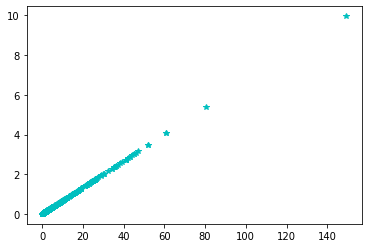

In [124]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,27],'*c')

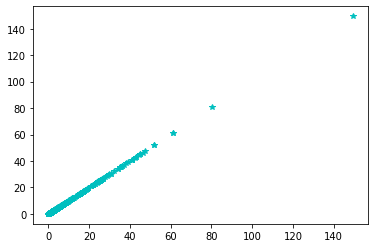

In [125]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,10],'*c')


**data ที่มี correlation เป็นค่าอื่นๆ**

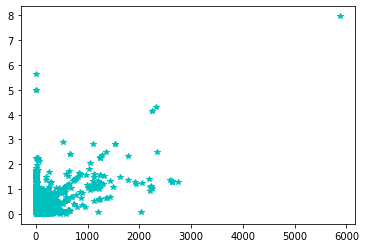

In [126]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'*c')

**ลบ column ซ้ำ**

In [128]:
newdata.columns.str.contains('_USRDA')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [129]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [130]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


**ลบ columns ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น**

**เอา VitE_mg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Magnesium_mg,Phosphorus_mg และ Zinc_mg ออกจาก newdata**

In [131]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [132]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**plot กราฟ parallel coordinate**

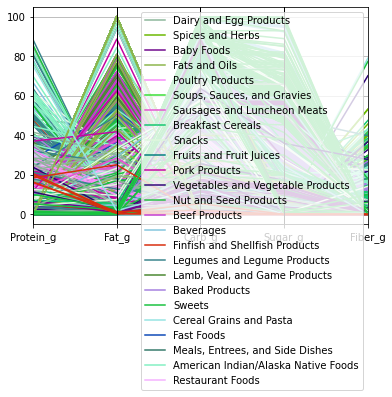

In [133]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

***
#**ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล**

In [136]:
pca_2 = PCA(n_components=2)

In [137]:
new_pca_2 = pca_2.fit_transform(newdata_dropped.to_numpy())

In [139]:
new_pca_2.shape

(8618, 2)

In [141]:
new_pca_2

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

**ดูว่ามี food group อะไรบ้าง**

In [142]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

**สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้**

In [143]:
FG_list = list(FG)
FG_list.sort() 
color_list_2 = {}
num = 0
for each_FG in FG:
   if each_FG not in color_list_2:
       color_list_2[each_FG] = num
       num += 1

In [145]:
color_list_2


{'American Indian/Alaska Native Foods': 4,
 'Baby Foods': 0,
 'Baked Products': 14,
 'Beef Products': 13,
 'Beverages': 15,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 10,
 'Dairy and Egg Products': 21,
 'Fast Foods': 20,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 22,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 19,
 'Legumes and Legume Products': 18,
 'Meals, Entrees, and Side Dishes': 16,
 'Nut and Seed Products': 24,
 'Pork Products': 3,
 'Poultry Products': 17,
 'Restaurant Foods': 23,
 'Sausages and Luncheon Meats': 8,
 'Snacks': 6,
 'Soups, Sauces, and Gravies': 2,
 'Spices and Herbs': 12,
 'Sweets': 1,
 'Vegetables and Vegetable Products': 7}

**แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด**

In [147]:
data_dropped2 = data_dropped.replace(color_list_2)

data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,21,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,21,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,21,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,21,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,21,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,22,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,22,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,1,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,22,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**plot กราฟ scatter**

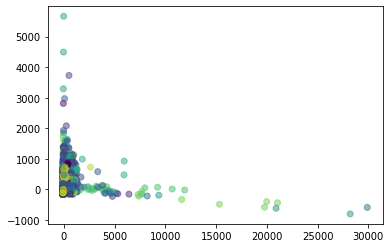

In [149]:
plt.scatter(new_pca_2[:,0],new_pca_2[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

In [152]:
vs = data_dropped2[(data_dropped2['FoodGroup']==14) | (data_dropped2['FoodGroup']==11)]
vs

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
2168,11,32.0,0.40,0.30,7.69,0.00,1.1,38.0,0.009,0.0,1677.6,14.0,12.0,0.086,0.20,0.000,0.6,0.042222,0.005294,0.0,18.640000,0.000000,0.0350,0.025000,0.046154,0.016667,0.010000,0.000096,0.042857,0.015714,0.010909,0.009091
2169,11,23.0,0.40,0.30,4.80,4.50,0.3,25.0,0.004,0.0,1600.0,14.0,10.0,0.086,0.50,0.000,0.1,0.027778,0.002353,0.0,17.777778,0.012000,0.0350,0.025000,0.046154,0.016667,0.008333,0.000096,0.028571,0.012857,0.001818,0.009091
2170,11,52.0,0.26,0.17,13.81,10.39,2.4,3.0,0.041,0.0,4.6,3.0,6.0,0.027,0.12,0.035,0.0,0.003333,0.024118,0.0,0.051111,0.012000,0.0075,0.005687,0.020000,0.014167,0.005000,0.000030,0.011905,0.015714,0.000000,0.003636
2171,11,48.0,0.27,0.13,12.76,10.10,1.3,2.0,0.037,0.0,4.0,0.0,5.0,0.031,0.07,0.038,0.0,0.002222,0.021765,0.0,0.044444,0.003333,0.0000,0.005687,0.021538,0.015833,0.004167,0.000034,0.009524,0.015714,0.000000,0.004545
2172,11,53.0,0.26,0.36,13.64,11.01,2.4,2.0,0.044,0.0,0.2,1.0,5.0,0.035,0.19,0.118,0.3,0.002222,0.025882,0.0,0.002222,0.003333,0.0025,0.005938,0.009231,0.013333,0.004167,0.000039,0.007143,0.011429,0.005455,0.003636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,14,291.0,9.62,5.65,50.43,3.55,2.2,0.0,0.095,0.0,0.0,0.0,84.0,0.129,3.25,0.514,27.9,0.000000,0.055882,0.0,0.000000,0.052667,0.0000,0.365000,0.392308,0.650000,0.070000,0.000143,0.064286,0.142857,0.507273,0.073636
8042,14,463.0,7.29,17.84,68.37,10.43,4.9,0.0,0.180,0.0,0.0,0.0,167.0,0.197,3.65,0.916,8.7,0.000000,0.105882,0.0,0.000000,0.193333,0.0000,0.278313,0.186923,0.266667,0.139167,0.000219,0.111905,0.508571,0.158182,0.100909
8043,14,460.0,3.02,22.55,61.22,45.16,5.1,0.0,0.096,0.0,0.0,3.0,5.0,0.269,0.82,0.000,6.8,0.000000,0.056471,0.0,0.000000,0.012667,0.0075,0.013750,0.046154,0.016667,0.004167,0.000299,0.069048,0.097143,0.123636,0.066364
8550,11,46.0,0.39,0.13,12.20,12.10,0.1,2.0,0.052,0.0,9.3,1.0,8.0,0.055,0.25,0.000,0.1,0.002222,0.030588,0.0,0.103333,0.080000,0.0025,0.005687,0.013846,0.007500,0.006667,0.000061,0.014286,0.018571,0.001818,0.009091


In [160]:
pca = PCA(n_components=2)
new_pca_3 = pca_2.fit_transform(vs.iloc[:,1:].to_numpy())

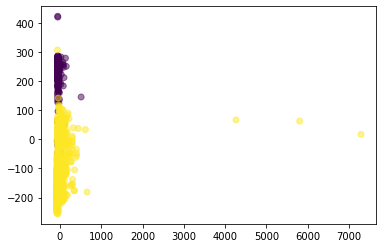

In [161]:
plt.scatter(new_pca_3[:,0],new_pca_3[:,1],c = vs['FoodGroup'],alpha=0.5)

In [163]:
bake_pca = pca_2.transform(vs[vs['FoodGroup']==14].iloc[:,1:].to_numpy())
juice_pca = pca_2.transform(vs[vs['FoodGroup']==11].iloc[:,1:].to_numpy())

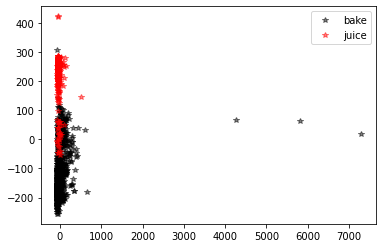

In [164]:
plt.plot(bake_pca[:,0],bake_pca[:,1],'*k',alpha=0.5,label='bake')
plt.plot(juice_pca[:,0],juice_pca[:,1],'*r',alpha=0.5,label='juice')
plt.legend()


**2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน**

In [165]:
pca_2.explained_variance_ratio_

array([0.64431075, 0.18635813])

**กล่าวได้ว่าตัวแทนข้อมูลนั้น เป็นตัวแทนที่ดี ด้วยระดับที่ 83.07%**

**เพื่อให้เกิดความชัดเจนจึง plot แบบใหม่ให้เข้าใจง่ายมากขึ้น**

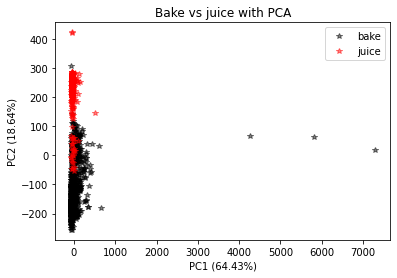

In [167]:
plt.plot(bake_pca[:,0],bake_pca[:,1],'*k',alpha=0.5,label='bake')
plt.plot(juice_pca[:,0],juice_pca[:,1],'*r',alpha=0.5,label='juice')
plt.legend()
plt.title('Bake vs juice with PCA')
plt.xlabel('PC1 (64.43%)')
plt.ylabel('PC2 (18.64%)');

**ทำ PCA ใหม่ เพราะ PC1 + PC2 ยังอธิบายข้อมูลได้ไม่ถึง 90%**

In [168]:

pca_2 = PCA()
new_pca_4 = pca_2.fit_transform(vs.iloc[:,1:].to_numpy())

In [169]:
pca_2.explained_variance_ratio_

array([6.44310750e-01, 1.86358125e-01, 8.15641634e-02, 5.37319491e-02,
       3.13149707e-02, 1.39755676e-03, 8.11557146e-04, 4.18035963e-04,
       5.10969182e-05, 2.71531554e-05, 8.62891072e-06, 3.38420919e-06,
       9.94679788e-07, 7.98916970e-07, 3.98241161e-07, 2.20507533e-07,
       8.32664914e-08, 4.13947258e-08, 3.24908802e-08, 2.57150656e-08,
       1.52820058e-08, 1.34062369e-08, 4.96043918e-09, 4.45418250e-33,
       4.45418250e-33, 4.45418250e-33, 4.45418250e-33, 4.45418250e-33,
       4.45418250e-33, 4.45418250e-33, 4.45418250e-33])

In [170]:
sum(pca_2.explained_variance_ratio_[:3])

0.9122330382687166

In [171]:
pca_3 = PCA(n_components=3)
new_pca_4 = pca_3.fit_transform(vs.iloc[:,1:].to_numpy())

In [174]:
new_pca_4

array([[ -54.00370914,  420.44103695,    7.98387488],
       [ -55.8384158 ,  423.42938991,   -3.99836256],
       [ -56.83099759,  254.15002933,  -18.60115818],
       ...,
       [ -72.30414146, -154.54591098,  -38.71597913],
       [ -54.68126696,  260.75396084,  -18.99562814],
       [  -3.11360075,   16.92860842,  -57.40961544]])

In [175]:
bake_pca3 = pca_3.transform(vs[vs['FoodGroup']==14].iloc[:,1:].to_numpy())
juice_pca3 = pca_3.transform(vs[vs['FoodGroup']==11].iloc[:,1:].to_numpy())

In [176]:
bake_pca3

array([[ 149.34220985,   21.89563168,  -68.51936356],
       [  28.84975132,   -1.3729495 ,  -74.20422669],
       [ -56.11490463,   15.14528132,  -25.47527564],
       ...,
       [  89.562468  , -162.21865192,  -42.85706871],
       [ -72.30414146, -154.54591098,  -38.71597913],
       [  -3.11360075,   16.92860842,  -57.40961544]])

In [177]:
juice_pca3

array([[-54.00370914, 420.44103695,   7.98387488],
       [-55.8384158 , 423.42938991,  -3.99836256],
       [-56.83099759, 254.15002933, -18.60115818],
       ...,
       [  7.07362046, 259.0181622 , -22.64803579],
       [-37.82222006, 254.51423823, -23.79787597],
       [-54.68126696, 260.75396084, -18.99562814]])

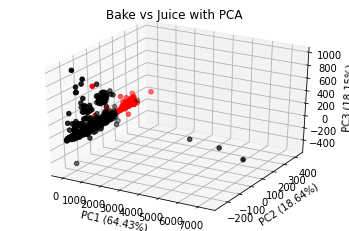

In [179]:
ax = plt.axes(projection ="3d")
ax.scatter3D(bake_pca3[:,0],bake_pca3[:,1],bake_pca3[:,2],c='k')
ax.scatter3D(juice_pca3[:,0],juice_pca3[:,1],juice_pca3[:,2],c='r')
ax.set_title('Bake vs Juice with PCA')
ax.set_xlabel('PC1 (64.43%)')
ax.set_ylabel('PC2 (18.64%)')
ax.set_zlabel('PC3 (18.15%)');

In [180]:
pca_3.explained_variance_ratio_

array([0.64431075, 0.18635813, 0.08156416])

**กล่าวได้ว่าตัวแทนข้อมูลนั้นที่เปลียนเป็น 3D เป็นตัวแทนที่ดีมาก ด้วยระดับที่ 91.22%**


***
***